# Task 5 EDA -Sports

# Author :Megha Sharma

Importing the libraries

Objective:: 
● Perform ‘Exploratory Data Analysis’ on dataset ‘Indian Premier League’

● As a sports analysts, find out the most successful teams, players and factors contributing win or loss of a team.

● Suggest teams or players a company should endorse for its products.

● Dataset:https://bit.ly/34SRn3b

In [84]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 


In [85]:
#importing datasets
mdf = pd.read_csv("E:/internships/sparks foundation/task 5/Indian Premier League/matches.csv")
ddf = pd.read_csv("E:/internships/sparks foundation/task 5/Indian Premier League/deliveries.csv")

In [86]:
mdf.head(5)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


DATA INFORMATION

In [87]:
mdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [88]:
mdf.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,2013.444444,0.025132,13.283069,3.350529
std,3464.478148,3.366895,0.156630,23.471144,3.387963
min,1.000000,2008.000000,0.000000,0.000000,0.000000
25%,189.750000,2011.000000,0.000000,0.000000,0.000000
50%,378.500000,2013.000000,0.000000,0.000000,4.000000
75%,567.250000,2016.000000,0.000000,19.000000,6.000000
max,11415.000000,2019.000000,1.000000,146.000000,10.000000


# Data cleaning with mdf data

In [89]:
for col in mdf.columns:
    print('{}:{}'.format(col,mdf[col].unique()))

id:[    1     2     3     4     5     6     7     8     9    10    11    12
    13    14    15    16    17    18    19    20    21    22    23    24
    25    26    27    28    29    30    31    32    33    34    35    36
    37    38    39    40    41    42    43    44    45    46    47    48
    49    50    51    52    53    54    55    56    57    58    59    60
    61    62    63    64    65    66    67    68    69    70    71    72
    73    74    75    76    77    78    79    80    81    82    83    84
    85    86    87    88    89    90    91    92    93    94    95    96
    97    98    99   100   101   102   103   104   105   106   107   108
   109   110   111   112   113   114   115   116   117   118   119   120
   121   122   123   124   125   126   127   128   129   130   131   132
   133   134   135   136   137   138   139   140   141   142   143   144
   145   146   147   148   149   150   151   152   153   154   155   156
   157   158   159   160   161   162   163   164

# EDA on matches dataset 


In [90]:
# Matches we have got in the dataset 
mdf['id'].max()

11415

In [91]:
# Seasons we have got in the dataset
mdf['season'].unique()

array([2017, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2018,
       2019], dtype=int64)

In [92]:
#Top 10 Player of the match
mdf['player_of_match'].value_counts()[0:10]

CH Gayle          21
AB de Villiers    20
RG Sharma         17
MS Dhoni          17
DA Warner         17
YK Pathan         16
SR Watson         15
SK Raina          14
G Gambhir         13
MEK Hussey        12
Name: player_of_match, dtype: int64

In [93]:
#Top 5 players of the match in the list
list(mdf['player_of_match'].value_counts()[0:5].keys())

['CH Gayle', 'AB de Villiers', 'RG Sharma', 'MS Dhoni', 'DA Warner']

In [94]:
#Finding out the number of toss with respect to each team
mdf['toss_winner'].value_counts()

Mumbai Indians                 98
Kolkata Knight Riders          92
Chennai Super Kings            89
Royal Challengers Bangalore    81
Kings XI Punjab                81
Delhi Daredevils               80
Rajasthan Royals               80
Sunrisers Hyderabad            46
Deccan Chargers                43
Pune Warriors                  20
Gujarat Lions                  15
Delhi Capitals                 10
Kochi Tuskers Kerala            8
Rising Pune Supergiants         7
Rising Pune Supergiant          6
Name: toss_winner, dtype: int64

In [95]:
mdf.iloc[mdf['win_by_runs'].idxmax()]['winner']

'Mumbai Indians'

In [96]:
#Team won by Maximum Wickets
mdf.iloc[mdf['win_by_wickets'].idxmax()]['winner']

'Kolkata Knight Riders'

In [97]:
#Team won by minimum runs
mdf.iloc[mdf[mdf['win_by_runs'].ge(1)].win_by_runs.idxmin()]['winner']

'Mumbai Indians'

In [98]:
#Team won by Minimum Wickets
mdf.iloc[mdf[mdf['win_by_wickets'].ge(1)].win_by_wickets.idxmin()]

id                                   560
season                              2015
city                             Kolkata
date                          2015-05-09
team1                    Kings XI Punjab
team2              Kolkata Knight Riders
toss_winner              Kings XI Punjab
toss_decision                        bat
result                            normal
dl_applied                             0
winner             Kolkata Knight Riders
win_by_runs                            0
win_by_wickets                         1
player_of_match               AD Russell
venue                       Eden Gardens
umpire1                     AK Chaudhary
umpire2                  HDPK Dharmasena
umpire3                              NaN
Name: 559, dtype: object

In [99]:
mdf.iloc[mdf[mdf['win_by_wickets'].ge(1)].win_by_wickets.idxmin()]['winner']

'Kolkata Knight Riders'

Observation :
Mumbai Indians is the team which won by maximum and minimum runs
Kolkata Knight Riders is the team which won by maximum and minimum wickets

In [100]:
#Details on Toss won by each team, Total Matches played so far, total matches being won list.
team_stats = pd.DataFrame({'Total Matches played': mdf.team1.value_counts() + mdf.team2.value_counts(), 'Total won': mdf.winner.value_counts(), 'Toss won': mdf.toss_winner.value_counts(), 
                          'Total lost': ((mdf.team1.value_counts() + mdf.team2.value_counts()) - mdf.winner.value_counts())})
team_stats = team_stats.reset_index()
team_stats.rename(columns = {'index':'Teams'}, inplace = True)
team_stats

,Teams,Total Matches played,Total won,Toss won,Total lost
0,Chennai Super Kings,164,100,89,64
1,Deccan Chargers,75,29,43,46
2,Delhi Capitals,16,10,10,6
3,Delhi Daredevils,161,67,80,94
4,Gujarat Lions,30,13,15,17
5,Kings XI Punjab,176,82,81,94
6,Kochi Tuskers Kerala,14,6,8,8
7,Kolkata Knight Riders,178,92,92,86
8,Mumbai Indians,187,109,98,78
9,Pune Warriors,46,12,20,34


In [101]:
#Analysis on Tie-winning / Tie-Loss and No result between teams

winloss_types = ['Tie/Wins','Tie/Loss','NR']
played =0
winloss_list1 = []

for t in mdf.team1.unique():
    for wl in winloss_types:
        Tie = 0
        if wl == 'Tie/Wins':             
            Tie = len(mdf[((mdf.result == 'tie') & (mdf.winner == t)) & ((mdf.team1 == t) | (mdf.team2 == t))])            
        elif wl == 'Tie/Loss':
            Tie = len(mdf[((mdf.result == 'tie') & (mdf.winner != t)) & ((mdf.team1 == t) | (mdf.team2 == t))])
        elif wl == 'NR':
            Tie = len(mdf[((mdf.result == 'no result') & (mdf.winner != t)) & ((mdf.team1 == t) | (mdf.team2 == t))])
        if (Tie!= 0):
            winloss_list1.append(Tie)
        else:
            winloss_list1.append(0)
            
winloss_ser1 = pd.Series(winloss_list1, index=pd.MultiIndex.from_product([mdf.team1.unique(), winloss_types]))
winloss_ser1.unstack()

,NR,Tie/Loss,Tie/Wins
Chennai Super Kings,0,1,0
Deccan Chargers,0,0,0
Delhi Capitals,0,0,1
Delhi Daredevils,2,1,0
Gujarat Lions,0,1,0
Kings XI Punjab,0,0,2
Kochi Tuskers Kerala,0,0,0
Kolkata Knight Riders,0,3,0
Mumbai Indians,0,0,2
Pune Warriors,1,0,0


In [102]:
winloss_types = ['WinlossTosswin','WinlossBat','WinlossField','winlossTie']
played =0
winloss_list = []
for t in mdf.team1.unique():
    for wl in winloss_types:
        won, loss, Tie = 0, 0, 0
        if wl == 'WinlossTosswin':
            won = len(mdf[(mdf.toss_winner == t) & (mdf.winner == t)])
            played = len(mdf[((mdf.team1 == t) | (mdf.team2 == t)) &
                 (((mdf.toss_winner == t) & (mdf.winner == t))
                  | ((mdf.toss_winner != t) & (mdf.winner != t)))])
        if wl == 'WinlossBat':
            won = len(mdf[(mdf.winner == t) & (((mdf.toss_winner == t) & (mdf.toss_decision == 'bat'))
                  | ((mdf.toss_winner != t) & (mdf.toss_decision == 'field')))])
            played = len(mdf[((mdf.team1 == t) | (mdf.team2 == t)) &
                 (((mdf.toss_winner == t) & (mdf.toss_decision == 'bat'))
                  | ((mdf.toss_winner != t) & (mdf.toss_decision == 'field')))])
        elif wl == 'WinlossField':
            won = len(mdf[(mdf.winner == t) & (((mdf.toss_winner == t) & (mdf.toss_decision == 'field'))
                  | ((mdf.toss_winner != t) & (mdf.toss_decision == 'bat')))])
            played = len(mdf[((mdf.team1 == t) | (mdf.team2 == t)) &
                 (((mdf.toss_winner == t) & (mdf.toss_decision == 'field'))
                  | ((mdf.toss_winner != t) & (mdf.toss_decision == 'bat')))])
        elif wl == 'winlossTie':
                won =len(mdf[((mdf.result == 'tie') & (mdf.winner == t)) & ((mdf.team1 == t) | (mdf.team2 == t))])
                played = len(mdf[((mdf.team1 == t) | (mdf.team2 == t))])
        
        if((won != 0) & (played != 0)):
            winloss_list.append(np.round(won/played,2))
        else:
            winloss_list.append(0)
        
winloss_ser2 = pd.Series(winloss_list, index=pd.MultiIndex.from_product([mdf.team1.unique(), winloss_types]))
winloss_ser2.unstack()

,WinlossBat,WinlossField,WinlossTosswin,winlossTie
Chennai Super Kings,0.57,0.65,0.64,0.00
Deccan Chargers,0.42,0.34,0.46,0.00
Delhi Capitals,0.50,0.70,0.70,0.06
Delhi Daredevils,0.35,0.47,0.42,0.00
Gujarat Lions,0.07,0.75,0.45,0.00
Kings XI Punjab,0.42,0.52,0.42,0.01
Kochi Tuskers Kerala,0.29,0.57,0.50,0.00
Kolkata Knight Riders,0.41,0.61,0.53,0.00
Mumbai Indians,0.57,0.59,0.61,0.01
Pune Warriors,0.30,0.23,0.15,0.00


In [103]:
Teams=['Chennai Super Kings','Deccan Chargers','Delhi Daredevils','Gujarat Lions','Kings XI Punjab','Kochi Tuskers Kerala','Kolkata Knight Riders','Mumbai Indians','Pune Warriors','Rajasthan Royals','Rising Pune Supergiants','Royal Challengers Bangalore','Sunrisers Hyderabad']
team_stats1 = pd.DataFrame({
         'WinlossTosswin':[0.60,0.46,0.41,0.55,0.44,0.50,0.54,0.60,0.15,0.57,0.38,0.45,0.54],
         'WinlossBat': [0.58,0.42,0.32,0.17, 0.41,0.29,0.44,0.57,0.30,0.46,0.00,0.44,0.49],
         'WinlossField':[0.63,0.34,0.50,0.80,0.54,0.57,0.59,0.58,0.23,0.59,0.71,0.56,0.64],
         'WinlossTie':[0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.02,0.00,0.01,0.02],
         'Tie/Loss':[1,0,1,0,0,0,2,0,0,1,0,1,0],
         'Tie/Win': [0,0,0,0,2,0,0,0,0,2,0,1,1],
         'NR': [0,0,2,0,0,0,0,0,1,1,0,2,0]},index=Teams)
team_stats1 = team_stats1.reset_index()
team_stats1 = team_stats1.rename(index=str, columns={"index": "Teams"})
team_stats1

Total_updates = pd.merge(team_stats,team_stats1, on='Teams')
Total_updates

,Teams,Total Matches played,Total won,Toss won,Total lost,WinlossTosswin,WinlossBat,WinlossField,WinlossTie,Tie/Loss,Tie/Win,NR
0,Chennai Super Kings,164,100,89,64,0.60,0.58,0.63,0.00,1,0,0
1,Deccan Chargers,75,29,43,46,0.46,0.42,0.34,0.00,0,0,0
2,Delhi Daredevils,161,67,80,94,0.41,0.32,0.50,0.00,1,0,2
3,Gujarat Lions,30,13,15,17,0.55,0.17,0.80,0.00,0,0,0
4,Kings XI Punjab,176,82,81,94,0.44,0.41,0.54,0.01,0,2,0
5,Kochi Tuskers Kerala,14,6,8,8,0.50,0.29,0.57,0.00,0,0,0
6,Kolkata Knight Riders,178,92,92,86,0.54,0.44,0.59,0.00,2,0,0
7,Mumbai Indians,187,109,98,78,0.60,0.57,0.58,0.00,0,0,0
8,Pune Warriors,46,12,20,34,0.15,0.30,0.23,0.00,0,0,1
9,Rajasthan Royals,147,75,80,72,0.57,0.46,0.59,0.02,1,2,1


In [104]:
#Calculating the Winloss for playing in home ground. (WINLOSS-HOME)
home_winner_CSK = len(mdf[((mdf.team1 == 'Chennai Super Kings') | (mdf.team2 == 'Chennai Super Kings')) & ((mdf.city == 'Chennai') & (mdf.winner == 'Chennai Super Kings'))])
home_winner_KKR = len(mdf[((mdf.team1 == 'Kolkata Knight Riders') | (mdf.team2 == 'Kolkata Knight Riders')) & ((mdf.city  == 'Kolkata') & (mdf.winner == 'Kolkata Knight Riders'))])
home_winner_RR = len(mdf[((mdf.team1 == 'Rajasthan Royals') | (mdf.team2 == 'Rajasthan Royals')) & ((mdf.city  == 'Jaipur') & (mdf.winner == 'Rajasthan Royals'))])
home_winner_MI = len(mdf[((mdf.team1 == 'Mumbai Indians') | (mdf.team2 == 'Mumbai Indians')) & ((mdf.city  == 'Mumbai') & (mdf.winner == 'Mumbai Indians'))])
home_winner_DC = len(mdf[((mdf.team1 == 'Deccan Chargers') | (mdf.team2 == 'Deccan Chargers')) & ((mdf.city  == 'Hyderabad') & (mdf.winner == 'Deccan Chargers'))])
home_winner_RCB = len(mdf[((mdf.team1 == 'Royal Challengers Bangalore') | (mdf.team2 == 'Royal Challengers Bangalore')) & ((mdf.city  == 'Bangalore') & (mdf.winner == 'Royal Challengers Bangalore'))])
home_winner_DD = len(mdf[((mdf.team1 == 'Delhi Daredevils') | (mdf.team2 == 'Delhi Daredevils')) & ((mdf.city  == 'Delhi') & (mdf.winner == 'Delhi Daredevils'))])
home_winner_KT = len(mdf[((mdf.team1 == 'Kochi Tuskers Kerala') | (mdf.team2 == 'Kochi Tuskers Kerala')) & ((mdf.city  == 'Kochi') & (mdf.winner == 'Kochi Tuskers Kerala'))])
home_winner_PW = len(mdf[((mdf.team1 == 'Pune Warriors') | (mdf.team2 == 'Pune Warriors')) & ((mdf.city  == 'Pune') & (mdf.winner == 'Pune Warriors'))])
home_winner_SH = len(mdf[((mdf.team1 == 'Sunrisers Hyderabad') | (mdf.team2 == 'Sunrisers Hyderabad')) & ((mdf.city  == 'Hyderabad') & (mdf.winner == 'Sunrisers Hyderabad'))])
home_winner_GL = len(mdf[((mdf.team1 == 'Gujarat Lions') | (mdf.team2 == 'Gujarat Lions')) & ((mdf.city  == 'Rajkot') & (mdf.winner == 'Gujarat Lions'))])
home_winner_RPS = len(mdf[((mdf.team1 == 'Rising Pune Supergiants') | (mdf.team2 == 'Rising Pune Supergiants')) & ((mdf.city  == 'Pune') & (mdf.winner== 'Rising Pune Supergiants'))])
home_winner_KXP = len(mdf[((mdf.team1 == 'Kings XI Punjab') | (mdf.team2 == 'Kings XI Punjab')) & ((mdf.city == 'Chandigarh') & (mdf.winner == 'Kings XI Punjab'))])


total_matches_played_CSK = len(mdf[((mdf.team1 == 'Chennai Super Kings') |  (mdf.team2 == 'Chennai Super Kings')) & (mdf.city == 'Chennai')])
total_matches_played_KKR = len(mdf[((mdf.team1 == 'Kolkata Knight Riders') | (mdf.team2 == 'Kolkata Knight Riders')) & (mdf.city == 'Kolkata')])
total_matches_played_RR = len(mdf[((mdf.team1 == 'Rajasthan Royals') | (mdf.team2 == 'Rajasthan Royals')) & (mdf.city == 'Jaipur')])
total_matches_played_MI = len(mdf[((mdf.team1 == 'Mumbai Indians') | (mdf.team2 == 'Mumbai Indians')) & (mdf.city== 'Mumbai')])
total_matches_played_DC = len(mdf[((mdf.team1 == 'Deccan Chargers') | (mdf.team2 == 'Deccan Chargers')) & (mdf.city == 'Hyderabad')])
total_matches_played_RCB = len(mdf[((mdf.team1 == 'Royal Challengers Bangalore') | (mdf.team2 == 'Royal Challengers Bangalore')) & (mdf.city== 'Bangalore')])
total_matches_played_DD = len(mdf[((mdf.team1 == 'Delhi Daredevils') | (mdf.team2 == 'Delhi Daredevils')) & (mdf.city == 'Delhi')])
total_matches_played_KT = len(mdf[((mdf.team1 == 'Kochi Tuskers Kerala') | (mdf.team2 == 'Kochi Tuskers Kerala')) & (mdf.city == 'Kochi')])
total_matches_played_PW = len(mdf[((mdf.team1 == 'Pune Warriors') | (mdf.team2 == 'Pune Warriors')) & (mdf.city == 'Pune')])
total_matches_played_SH = len(mdf[((mdf.team1 == 'Sunrisers Hyderabad') | (mdf.team2 == 'Sunrisers Hyderabad')) & (mdf.city== 'Hyderabad')])
total_matches_played_GL = len(mdf[((mdf.team1 == 'Gujarat Lions') | (mdf.team2 == 'Gujarat Lions')) & (mdf.city == 'Rajkot')])
total_matches_played_RPS = len(mdf[((mdf.team1 == 'Rising Pune Supergiants') | (mdf.team2 == 'Rising Pune Supergiants')) & (mdf.city == 'Pune')])
total_matches_played_KXP = len(mdf[((mdf.team1 == 'Kings XI Punjab') | (mdf.team2 == 'Kings XI Punjab')) & (mdf.city == 'Chandigarh')])

winloss_home_CSK = home_winner_CSK / total_matches_played_CSK
winloss_home_KKR = home_winner_KKR / total_matches_played_KKR
winloss_home_RR = home_winner_RR / total_matches_played_RR
winloss_home_MI = home_winner_MI / total_matches_played_MI
winloss_home_DC = home_winner_DC / total_matches_played_DC
winloss_home_RCB = home_winner_RCB / total_matches_played_RCB
winloss_home_DD = home_winner_DD / total_matches_played_DD
winloss_home_KT = home_winner_KT / total_matches_played_KT
winloss_home_PW = home_winner_PW / total_matches_played_PW
winloss_home_SH = home_winner_SH / total_matches_played_SH
winloss_home_GL = home_winner_GL / total_matches_played_GL
winloss_home_RPS = home_winner_RPS / total_matches_played_RPS
winloss_home_KXP = home_winner_KXP / total_matches_played_KXP

winlossHome=pd.Series([winloss_home_CSK,winloss_home_DC,winloss_home_DD,winloss_home_GL,winloss_home_KXP,winloss_home_KT,winloss_home_KKR,winloss_home_MI,winloss_home_PW,winloss_home_RR,winloss_home_RPS,winloss_home_RCB,winloss_home_SH],index=['Chennai Super Kings','Deccan Chargers','Delhi Daredevils','Gujarat Lions','Kings XI Punjab','Kochi Tuskers Kerala','Kolkata Knight Riders','Mumbai Indians','Pune Warriors','Rajasthan Royals','Rising Pune Supergiants','Royal Challengers Bangalore','Sunrisers Hyderabad'])
winlossHome=pd.DataFrame({'WinlossHome':winlossHome})
winlossHome=winlossHome.round(2)
winlossHome=winlossHome.reset_index()
winlossHome=winlossHome.rename(index=str, columns={"index": "Teams"})

In [105]:
Total_updates = pd.merge(Total_updates,winlossHome, on='Teams')
Total_updates

,Teams,Total Matches played,Total won,Toss won,Total lost,WinlossTosswin,WinlossBat,WinlossField,WinlossTie,Tie/Loss,Tie/Win,NR,WinlossHome
0,Chennai Super Kings,164,100,89,64,0.60,0.58,0.63,0.00,1,0,0,0.71
1,Deccan Chargers,75,29,43,46,0.46,0.42,0.34,0.00,0,0,0,0.17
2,Delhi Daredevils,161,67,80,94,0.41,0.32,0.50,0.00,1,0,2,0.43
3,Gujarat Lions,30,13,15,17,0.55,0.17,0.80,0.00,0,0,0,0.30
4,Kings XI Punjab,176,82,81,94,0.44,0.41,0.54,0.01,0,2,0,0.48
5,Kochi Tuskers Kerala,14,6,8,8,0.50,0.29,0.57,0.00,0,0,0,0.40
6,Kolkata Knight Riders,178,92,92,86,0.54,0.44,0.59,0.00,2,0,0,0.61
7,Mumbai Indians,187,109,98,78,0.60,0.57,0.58,0.00,0,0,0,0.65
8,Pune Warriors,46,12,20,34,0.15,0.30,0.23,0.00,0,0,1,0.25
9,Rajasthan Royals,147,75,80,72,0.57,0.46,0.59,0.02,1,2,1,0.68


In [106]:
#Calculating the Winloss for playing in other ground. (WINLOSS-AWAY)
away_winner_CSK =  len(mdf[((mdf.team1 == 'Chennai Super Kings') | (mdf.team2 == 'Chennai Super Kings')) & ((mdf.city != 'Chennai') & (mdf.winner == 'Chennai Super Kings'))])
away_winner_KKR =  len(mdf[((mdf.team1 == 'Kolkata Knight Riders') | (mdf.team2 == 'Kolkata Knight Riders')) & ((mdf.city != 'Kolkata') & (mdf.winner == 'Kolkata Knight Riders'))])
away_winner_RR =  len(mdf[((mdf.team1 == 'Rajasthan Royals') |(mdf.team2== 'Rajasthan Royals')) & ((mdf.city != 'Jaipur') & (mdf.winner == 'Rajasthan Royals'))])
away_winner_MI =  len(mdf[((mdf.team1 == 'Mumbai Indians') | (mdf.team2 == 'Mumbai Indians')) & ((mdf.city!= 'Mumbai') & (mdf.winner== 'Mumbai Indians'))])
away_winner_DC =  len(mdf[((mdf.team1 == 'Deccan Chargers') | (mdf.team2 == 'Deccan Chargers')) & ((mdf.city != 'Hyderabad') & (mdf.winner== 'Deccan Chargers'))])
away_winner_RCB = len(mdf[((mdf.team1 == 'Royal Challengers Bangalore') | (mdf.team2 == 'Royal Challengers Bangalore')) & ((mdf.city != 'Bangalore') & (mdf.winner == 'Royal Challengers Bangalore'))])
away_winner_DD =  len(mdf[((mdf.team1 == 'Delhi Daredevils') | (mdf.team2 == 'Delhi Daredevils')) & ((mdf.city != 'Delhi') & (mdf.winner == 'Delhi Daredevils'))])
away_winner_KT =  len(mdf[((mdf.team1== 'Kochi Tuskers Kerala') | (mdf.team2 == 'Kochi Tuskers Kerala')) & ((mdf.city != 'Kochi') & (mdf.winner == 'Kochi Tuskers Kerala'))])
away_winner_PW = len(mdf[((mdf.team1 == 'Pune Warriors') | (mdf.team2 == 'Pune Warriors')) & ((mdf.city == 'Pune') & (mdf.winner != 'Pune Warriors'))])
away_winner_SH =  len(mdf[((mdf.team1 == 'Sunrisers Hyderabad') | (mdf.team2 == 'Sunrisers Hyderabad')) & ((mdf.city != 'Hyderabad') & (mdf.winner== 'Sunrisers Hyderabad'))])
away_winner_GL =  len(mdf[((mdf.team1 == 'Gujarat Lions') | (mdf.team2 == 'Gujarat Lions')) & ((mdf.city!= 'Rajkot') & (mdf.winner== 'Gujarat Lions'))])
away_winner_RPS =  len(mdf[((mdf.team1== 'Rising Pune Supergiants') |(mdf.team2 == 'Rising Pune Supergiants')) & ((mdf.city!= 'Pune') & (mdf.winner == 'Rising Pune Supergiants'))])
away_winner_KXP =  len(mdf[((mdf.team1 == 'Kings XI Punjab') | (mdf.team2== 'Kings XI Punjab')) & ((mdf.city != 'Chandigarh') & (mdf.winner == 'Kings XI Punjab'))])

total_matches_played_CSK1 = len(mdf[((mdf.team1== 'Chennai Super Kings') | (mdf.team2 == 'Chennai Super Kings')) & (mdf.city != 'Chennai')])
total_matches_played_KKR1 = len(mdf[((mdf.team1== 'Kolkata Knight Riders') | (mdf.team2 == 'Kolkata Knight Riders')) & (mdf.city != 'Kolkata')])
total_matches_played_RR1 = len(mdf[((mdf.team1 == 'Rajasthan Royals') | (mdf.team2 == 'Rajasthan Royals')) & (mdf.city != 'Jaipur')])
total_matches_played_MI1 = len(mdf[((mdf.team1== 'Mumbai Indians') | (mdf.team2 == 'Mumbai Indians')) & (mdf.city!= 'Mumbai')])
total_matches_played_DC1 = len(mdf[((mdf.team1 == 'Deccan Chargers') | (mdf.team2 == 'Deccan Chargers')) & (mdf.city != 'Hyderabad')])
total_matches_played_RCB1 = len(mdf[((mdf.team1 == 'Royal Challengers Bangalore') | (mdf.team2 == 'Royal Challengers Bangalore')) & (mdf.city != 'Bangalore')])
total_matches_played_DD1 = len(mdf[((mdf.team1 == 'Delhi Daredevils') | (mdf.team2 == 'Delhi Daredevils')) & (mdf.city!= 'Delhi')])
total_matches_played_KT1 = len(mdf[((mdf.team1== 'Kochi Tuskers Kerala') | (mdf.team2 == 'Kochi Tuskers Kerala')) & (mdf.city != 'Kochi')])
total_matches_played_PW1 = len(mdf[((mdf.team1 == 'Pune Warriors') | (mdf.team2 == 'Pune Warriors')) & (mdf.city!= 'Pune')])
total_matches_played_SH1 = len(mdf[((mdf.team1 == 'Sunrisers Hyderabad') | (mdf.team2 == 'Sunrisers Hyderabad')) & (mdf.city != 'Hyderabad')])
total_matches_played_GL1 = len(mdf[((mdf.team1 == 'Gujarat Lions') | (mdf.team2 == 'Gujarat Lions')) & (mdf.city != 'Rajkot')])
total_matches_played_RPS1 = len(mdf[((mdf.team1 == 'Rising Pune Supergiants') | (mdf.team2 == 'Rising Pune Supergiants')) & (mdf.city != 'Pune')])
total_matches_played_KXP1 = len(mdf[((mdf.team1 == 'Kings XI Punjab') | (mdf.team2 == 'Kings XI Punjab')) & (mdf.city != 'Chandigarh')])

winloss_away_CSK = away_winner_CSK / total_matches_played_CSK1
winloss_away_KKR = away_winner_KKR / total_matches_played_KKR1
winloss_away_RR = away_winner_RR / total_matches_played_RR1
winloss_away_MI = away_winner_MI / total_matches_played_MI1
winloss_away_DC = away_winner_DC / total_matches_played_DC1
winloss_away_RCB = away_winner_RCB / total_matches_played_RCB1
winloss_away_DD = away_winner_DD / total_matches_played_DD1
winloss_away_KT = away_winner_KT / total_matches_played_KT1
winloss_away_PW = away_winner_PW / total_matches_played_PW1
winloss_away_SH = away_winner_SH / total_matches_played_SH1
winloss_away_GL = away_winner_GL / total_matches_played_GL1
winloss_away_RPS = away_winner_RPS / total_matches_played_RPS1
winloss_away_KXP = away_winner_KXP / total_matches_played_KXP1

winlossAway=pd.Series([winloss_away_CSK,winloss_away_DC,winloss_away_DD,winloss_away_GL,winloss_away_KXP,winloss_away_KT,winloss_away_KKR,winloss_away_MI,winloss_away_PW,winloss_away_RR,winloss_away_RPS,winloss_away_RCB,winloss_away_SH],index=['Chennai Super Kings','Deccan Chargers','Delhi Daredevils','Gujarat Lions','Kings XI Punjab','Kochi Tuskers Kerala','Kolkata Knight Riders','Mumbai Indians','Pune Warriors','Rajasthan Royals','Rising Pune Supergiants','Royal Challengers Bangalore','Sunrisers Hyderabad'])
winlossAway= pd.DataFrame({'WinlossAway':winlossAway})
winlossAway=winlossAway.round(2)
winlossAway= winlossAway.reset_index()
winlossAway= winlossAway.rename(index=str, columns={"index": "Teams"})

In [107]:
Record_Summary = pd.merge(Total_updates,winlossAway, on='Teams')
Record_Summary

,Teams,Total Matches played,Total won,Toss won,Total lost,WinlossTosswin,WinlossBat,WinlossField,WinlossTie,Tie/Loss,Tie/Win,NR,WinlossHome,WinlossAway
0,Chennai Super Kings,164,100,89,64,0.60,0.58,0.63,0.00,1,0,0,0.71,0.56
1,Deccan Chargers,75,29,43,46,0.46,0.42,0.34,0.00,0,0,0,0.17,0.46
2,Delhi Daredevils,161,67,80,94,0.41,0.32,0.50,0.00,1,0,2,0.43,0.41
3,Gujarat Lions,30,13,15,17,0.55,0.17,0.80,0.00,0,0,0,0.30,0.50
4,Kings XI Punjab,176,82,81,94,0.44,0.41,0.54,0.01,0,2,0,0.48,0.46
5,Kochi Tuskers Kerala,14,6,8,8,0.50,0.29,0.57,0.00,0,0,0,0.40,0.44
6,Kolkata Knight Riders,178,92,92,86,0.54,0.44,0.59,0.00,2,0,0,0.61,0.45
7,Mumbai Indians,187,109,98,78,0.60,0.57,0.58,0.00,0,0,0,0.65,0.53
8,Pune Warriors,46,12,20,34,0.15,0.30,0.23,0.00,0,0,1,0.25,0.40
9,Rajasthan Royals,147,75,80,72,0.57,0.46,0.59,0.02,1,2,1,0.68,0.43


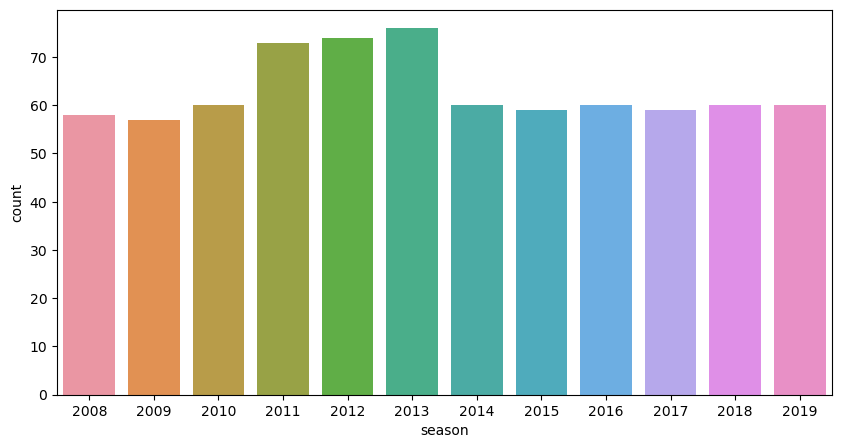

In [108]:
#Season Which had most number of matches
plt.figure(figsize=(10,5))
sns.countplot(x='season', data=mdf)
plt.show()

Mumbai Indians are the winners in most of the matches


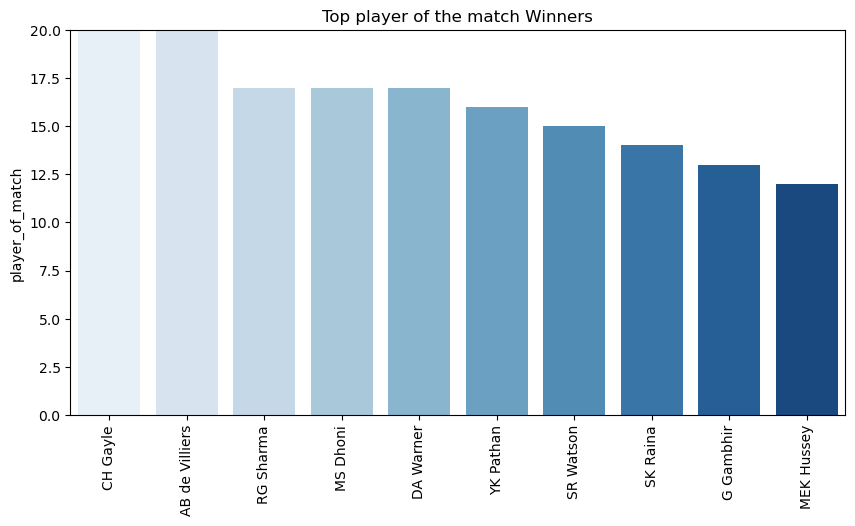

In [109]:
#Top Player of the match winners
top_players = mdf.player_of_match.value_counts()[:10]
#sns.barplot(x="day", y="total_bill", data=df)
fig, ax = plt.subplots(figsize=(10,5))
ax.set_ylim([0,20])
ax.set_ylabel("Count")
ax.set_title("Top player of the match Winners")
top_players.plot.bar()
sns.barplot(x = top_players.index, y = top_players, orient='v', palette="Blues");
plt.show()

CH Gayle is the most Successful player in all match winners

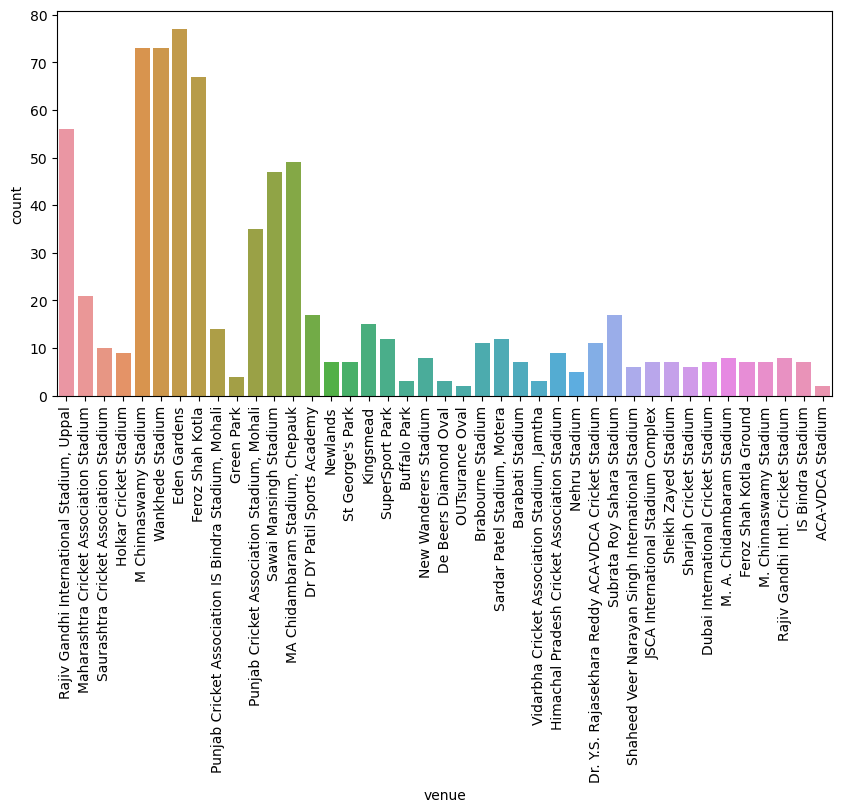

In [110]:
#Number of matches in each venue:
plt.figure(figsize=(10,5))
sns.countplot(x='venue', data=mdf)
plt.xticks(rotation='vertical')
plt.show()

There are quite a few venues present in the data with "M Chinnaswamy Stadium" being the one with most number of matches followed by "Eden Gardens"

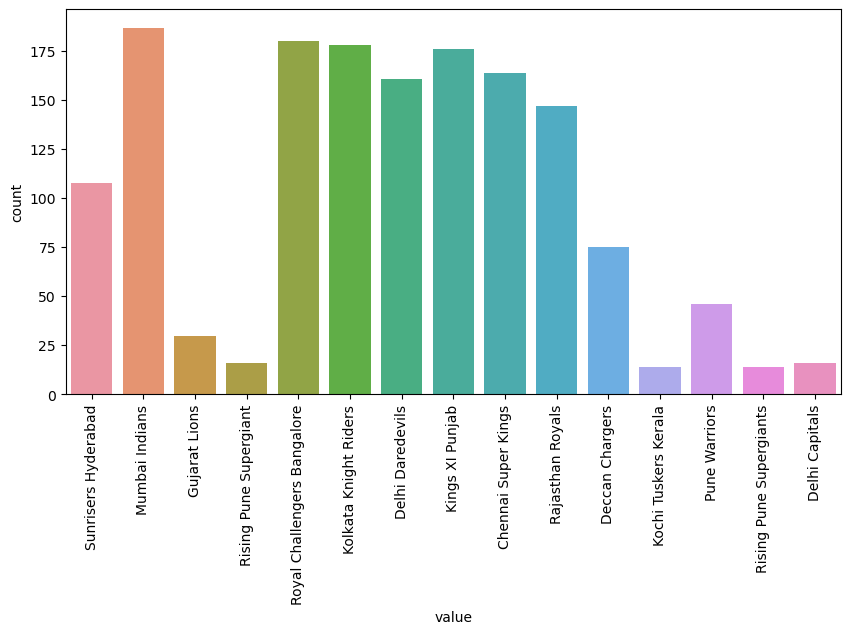

In [111]:
#Number of matches played by each team:
temp_df = pd.melt(mdf, id_vars=['id','season'], value_vars=['team1', 'team2'])

plt.figure(figsize=(10,5))
sns.countplot(x='value', data=temp_df)
plt.xticks(rotation='vertical')
plt.show()

"Mumbai Indians" lead the pack with most number of matches played followed by "Royal Challengers Bangalore". There are also teams with very few matches like 'Rising Pune Supergiants', 'Gujarat Lions' as they are new teams that came in only last season.

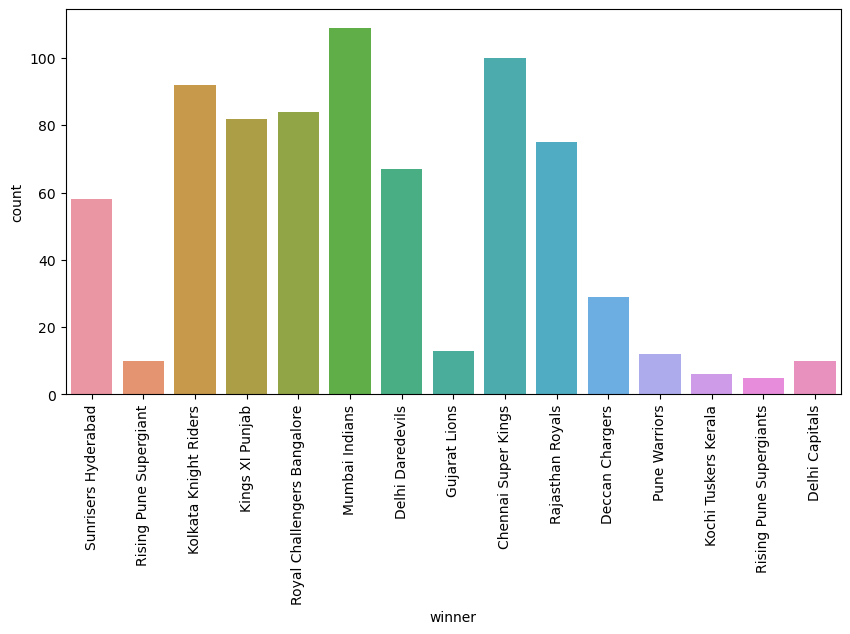

In [112]:
#Number of wins per team:
plt.figure(figsize=(10,5))
sns.countplot(x='winner', data=mdf)
plt.xticks(rotation=90)
plt.show()

MI again leads the pack followed by CSK.

Champions each season:

Now let us see the champions in each season.

In [113]:
temp_df = mdf.drop_duplicates(subset=['season'], keep='last')[['season', 'winner']].reset_index(drop=True)
temp_df

,season,winner
0,2017,Mumbai Indians
1,2008,Rajasthan Royals
2,2009,Deccan Chargers
3,2010,Chennai Super Kings
4,2011,Chennai Super Kings
5,2012,Kolkata Knight Riders
6,2013,Mumbai Indians
7,2014,Kolkata Knight Riders
8,2015,Mumbai Indians
9,2016,Sunrisers Hyderabad


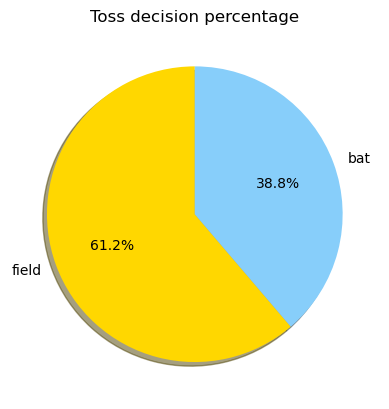

In [114]:
#Toss decision:
#Let us see the toss decisions taken so far.

temp_series = mdf.toss_decision.value_counts()
labels = (np.array(temp_series.index))
sizes = (np.array((temp_series / temp_series.sum())*100))
colors = ['gold', 'lightskyblue']
plt.pie(sizes, labels=labels, colors=colors,autopct='%1.1f%%', shadow=True, startangle=90)
plt.title("Toss decision percentage")
plt.show()

Almost 55% of the toss decisions are made to field first. Now let us see how this decision varied over time.

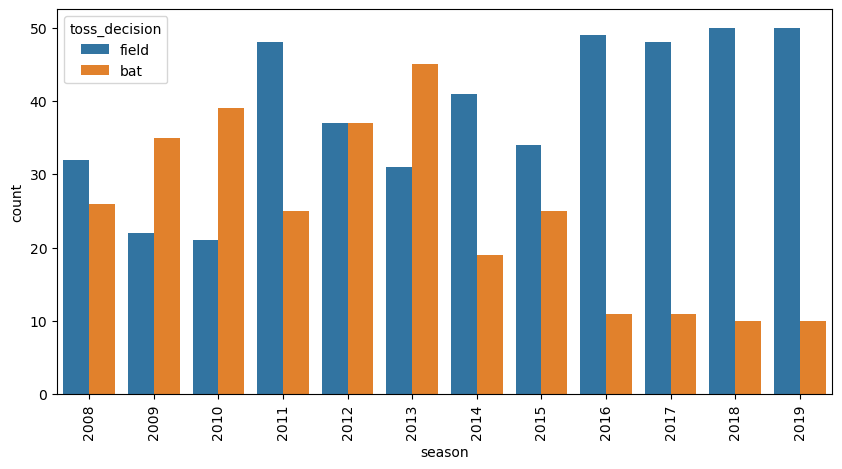

In [115]:
plt.figure(figsize=(10,5))
sns.countplot(x='season', hue='toss_decision', data=mdf)
plt.xticks(rotation='vertical')
plt.show()

It seems during the initial years, teams wanted to bat first. Voila.! Look at the 2016 season, most of the toss decisions are to field first.

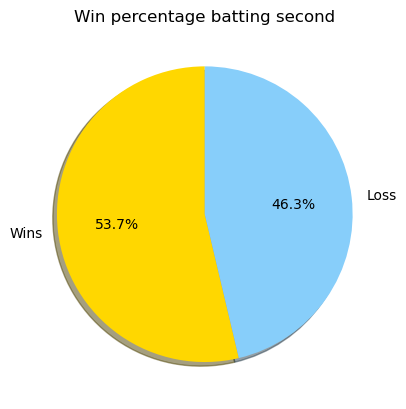

In [116]:
# Since there is a very strong trend towards batting second let us see the win percentage of teams batting second.
num_of_wins = (mdf.win_by_wickets>0).sum()
num_of_loss = (mdf.win_by_wickets==0).sum()
labels = ["Wins", "Loss"]
total = float(num_of_wins + num_of_loss)
sizes = [(num_of_wins/total)*100, (num_of_loss/total)*100]
colors = ['gold', 'lightskyblue']
plt.pie(sizes, labels=labels, colors=colors,autopct='%1.1f%%', shadow=True, startangle=90)
plt.title("Win percentage batting second")
plt.show()

So percentage of times teams batting second has won is 53.2. Now let us split this by year and see the distribution.

In [117]:
#Top players of the match:
# create a function for labeling 

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.02*height,
                '%d' % int(height),
                ha='center', va='bottom')

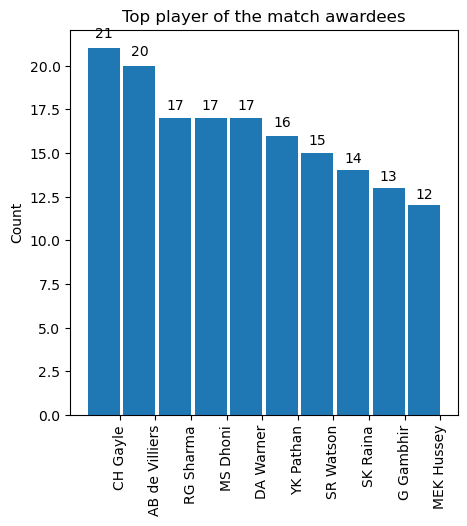

In [118]:
temp_series = mdf.player_of_match.value_counts()[:10]
labels = np.array(temp_series.index)
ind = np.arange(len(labels))
width = 0.9
fig, ax = plt.subplots(figsize=(5,5))
rects = ax.bar(ind, np.array(temp_series), width=width)
ax.set_xticks(ind+((width)/2.))
ax.set_xticklabels(labels, rotation='vertical')
ax.set_ylabel("Count")
ax.set_title("Top player of the match awardees")
autolabel(rects)
plt.show()

CH Gayle is the top player of the match awardee in all the seasons of IPL

# Top Umpires:

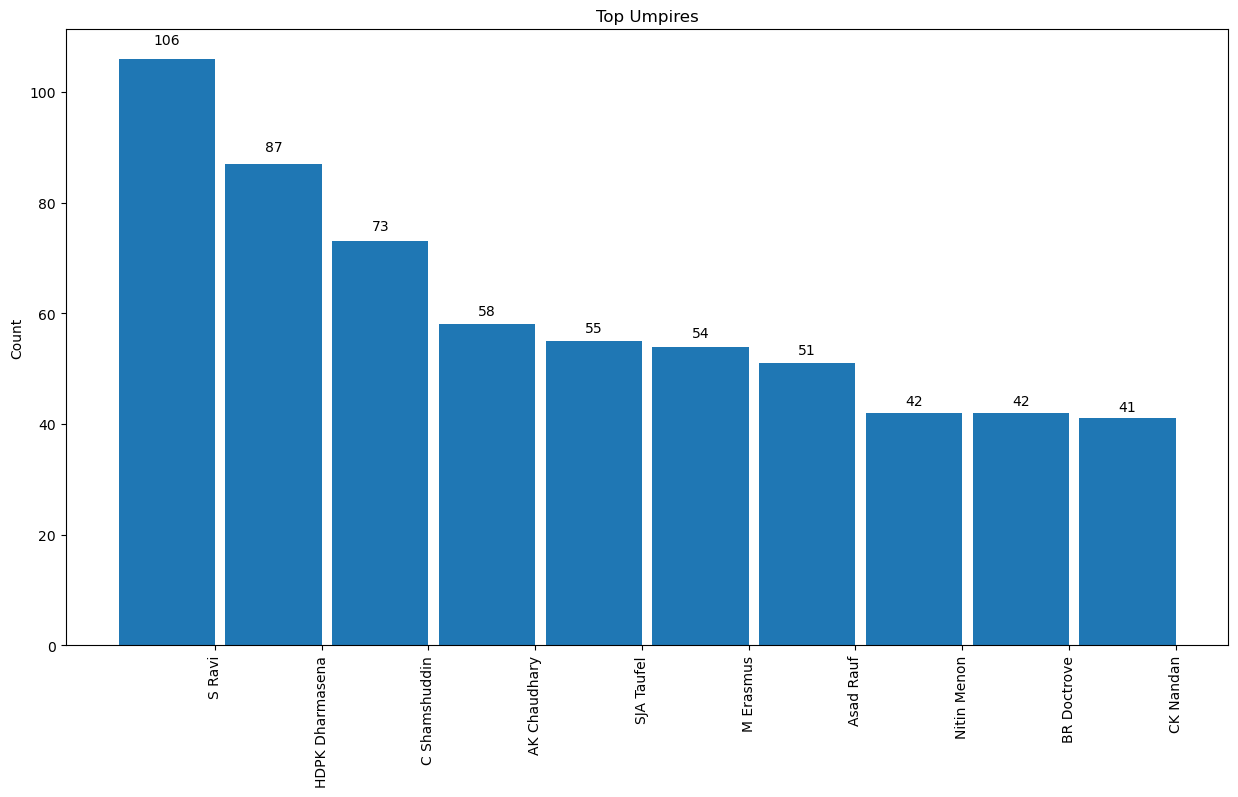

In [119]:
temp_df = pd.melt(mdf, id_vars=['id'], value_vars=['umpire1', 'umpire2'])

temp_series = temp_df.value.value_counts()[:10]
labels = np.array(temp_series.index)
ind = np.arange(len(labels))
width = 0.9
fig, ax = plt.subplots(figsize=(15,8))
rects = ax.bar(ind, np.array(temp_series), width=width,)
ax.set_xticks(ind+((width)/2.))
ax.set_xticklabels(labels, rotation='vertical')
ax.set_ylabel("Count")
ax.set_title("Top Umpires")
autolabel(rects)
plt.show()

Dharmasena seems to be the most sought after umpire for IPL matches followed by Ravi. Others are fairly close to each other.

# Score Data Set

# Data cleaning with ddf data

In [120]:
ddf.head(5)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [121]:
ddf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

In [122]:
ddf.describe()

,match_id,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
count,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000
mean,1802.252957,1.482952,10.162488,3.615587,0.000452,0.036721,0.004936,0.021136,0.004183,0.000056,1.246864,0.067032,1.313897
std,3472.322805,0.502074,5.677684,1.806966,0.021263,0.251161,0.116480,0.194908,0.070492,0.016709,1.608270,0.342553,1.605422
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,190.000000,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,379.000000,1.000000,10.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,567.000000,2.000000,15.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,11415.000000,5.000000,20.000000,9.000000,1.000000,5.000000,4.000000,5.000000,5.000000,5.000000,7.000000,7.000000,10.000000


In [123]:
for col in ddf.columns:
    print('{}:{}'.format(col,ddf[col].unique()))

match_id:[    1     2     3     4     5     6     7     8     9    10    11    12
    13    14    15    16    17    18    19    20    21    22    23    24
    25    26    27    28    29    30    31    32    33    34    35    36
    37    38    39    40    41    42    43    44    45    46    47    48
    49    50    51    52    53    54    55    56    57    58    59    60
    61    62    63    64    65    66    67    68    69    70    71    72
    73    74    75    76    77    78    79    80    81    82    83    84
    85    86    87    88    89    90    91    92    93    94    95    96
    97    98    99   100   101   102   103   104   105   106   107   108
   109   110   111   112   113   114   115   116   117   118   119   120
   121   122   123   124   125   126   127   128   129   130   131   132
   133   134   135   136   137   138   139   140   141   142   143   144
   145   146   147   148   149   150   151   152   153   154   155   156
   157   158   159   160   161   162   163

fielder:[nan 'Mandeep Singh' 'Sachin Baby' 'DA Warner' 'BCJ Cutting'
 'Yuvraj Singh' 'MC Henriques' 'CJ Jordan (sub)' 'MS Dhoni' 'R Bhatia'
 'MA Agarwal' 'RG Sharma' 'N Rana' 'TG Southee' 'YK Pathan'
 'Kuldeep Yadav' 'MP Stoinis' 'M Vohra' 'GJ Maxwell' 'MK Tiwary'
 'BA Stokes' 'SV Samson' 'RR Pant' 'SW Billings' 'S Nadeem' 'CH Morris'
 'B Stanlake' 'STR Binny' 'S Dhawan' 'V Shankar (sub)' 'NV Ojha'
 'Rashid Khan' 'BB McCullum' 'MJ McClenaghan' 'HH Pandya' 'KA Pollard'
 'RV Uthappa' 'R Dhawan (sub)' 'SP Narine' 'WP Saha' 'KK Nair' 'A Mishra'
 'PA Patel' 'B Kumar' 'G Gambhir' 'MK Pandey' 'CR Woakes' 'SA Yadav'
 'AR Patel' 'JC Buttler' 'JJ Bumrah' 'CH Gayle' 'S Aravind'
 'AB de Villiers' 'SK Raina' 'AJ Finch' 'Ishan Kishan' 'RD Chahar'
 'C de Grandhomme' 'EJG Morgan' 'DA Miller' 'MM Sharma' 'Z Khan'
 'KH Pandya' 'JJ Roy' 'KD Karthik' 'RA Jadeja' 'V Kohli' 'AM Rahane'
 'RA Tripathi' 'UT Yadav' 'AD Mathews' 'Sandeep Sharma' 'DR Smith'
 'SR Watson' 'KM Jadhav' 'AF Milne' 'P Negi' 'YS Chahal'

In [124]:
#About first Match
match_1 = ddf[ddf['match_id']==1]
match_1.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [125]:
batsmen_summary = ddf.groupby("batsman").agg({'ball': 'count','batsman_runs': 'sum'})
batsmen_summary.rename(columns={'ball':'balls', 'batsman_runs': 'runs'}, inplace=True)
batsmen_summary = batsmen_summary.sort_values(['balls','runs'], ascending=False)[:20]
batsmen_summary.head(10)

,balls,runs
batsman,,
V Kohli,4211,5434
SK Raina,4044,5415
RG Sharma,3816,4914
S Dhawan,3776,4632
G Gambhir,3524,4223
RV Uthappa,3492,4446
DA Warner,3398,4741
MS Dhoni,3318,4477
AM Rahane,3215,3850


How is the strike rate of batsmen calculated?
Strike Rate = (Total Runs Scored)/(Total Balls Faced)*100
The higher the strike rate, the more effective a batsman is at scoring quickly.

In [126]:
batsmen_summary['batting_strike_rate'] = batsmen_summary['runs']/batsmen_summary['balls'] * 100
batsmen_summary['batting_strike_rate'] = batsmen_summary['batting_strike_rate'].round(2)
batsmen_summary.head(10)

,balls,runs,batting_strike_rate
batsman,,,
V Kohli,4211,5434,129.04
SK Raina,4044,5415,133.90
RG Sharma,3816,4914,128.77
S Dhawan,3776,4632,122.67
G Gambhir,3524,4223,119.84
RV Uthappa,3492,4446,127.32
DA Warner,3398,4741,139.52
MS Dhoni,3318,4477,134.93
AM Rahane,3215,3850,119.75


Player dismissed: In cricket, a player is said to be dismissed when they lose their wicket. A batsman can be dismissed in a number of ways, the most common being bowled, caught, leg before wicket (LBW), stumped, run out and hit wicket.

In [128]:
print("Top dismissal_kind types")
index = ddf['dismissal_kind'].value_counts().index.tolist()
count = ddf['dismissal_kind'].value_counts().tolist()
pd.DataFrame({'dismissal_kind': index[1:], 'total_num':count[1:]})

Top dismissal_kind types


,dismissal_kind,total_num
0,bowled,1581
1,run out,852
2,lbw,540
3,stumped,278
4,caught and bowled,211
5,retired hurt,12
6,hit wicket,10
7,obstructing the field,2


In [129]:
#utility function used later
def trybuild(lookuplist, buildlist):
    alist = []
    for i in buildlist.index:
        try:
            #print(i)
            alist.append(lookuplist[i])
            #print(alist)
        except KeyError:
            #print('except')
            alist.append(0)
    return alist

In [130]:
alist = []
for dk in ddf.dismissal_kind.unique():
    for dk in ['nan','hit wicket', 'retired hurt', 'obstructing the field']:
        lookuplist = ddf[ddf.dismissal_kind == dk].groupby('player_dismissed')['player_dismissed'].count()
        batsmen_summary[dk] = trybuild(lookuplist, batsmen_summary)
        try:
            alist.append(lookuplist[dk])
        except KeyError:
            alist.append(0)
TopBatsman = batsmen_summary.sort_values(['balls','runs'], ascending=False)[:20]
TopBatsman

,balls,runs,batting_strike_rate,nan,hit wicket,retired hurt,obstructing the field
batsman,,,,,,,
V Kohli,4211,5434,129.04,0,0,0,0
SK Raina,4044,5415,133.90,0,0,0,0
RG Sharma,3816,4914,128.77,0,0,0,0
S Dhawan,3776,4632,122.67,0,0,1,0
G Gambhir,3524,4223,119.84,0,0,0,0
RV Uthappa,3492,4446,127.32,0,0,0,0
DA Warner,3398,4741,139.52,0,1,0,0
MS Dhoni,3318,4477,134.93,0,0,0,0
AM Rahane,3215,3850,119.75,0,0,0,0


In [131]:
alist = []
for r in ddf.batsman_runs.unique():
    lookuplist = ddf[ddf.batsman_runs == r].groupby('batsman')['batsman'].count()
    batsmen_summary[str(r) + 's'] = trybuild(lookuplist, batsmen_summary)
    try:
        alist.append(lookuplist[dk])
    except KeyError:
        alist.append(0)
TopBatsman = batsmen_summary.sort_values(['balls','runs'], ascending=False)[:20]
TopBatsman.head()

,balls,runs,batting_strike_rate,nan,hit wicket,retired hurt,obstructing the field,0s,4s,1s,6s,3s,2s,5s,7s
batsman,,,,,,,,,,,,,,,
V Kohli,4211,5434,129.04,0,0,0,0,1493,482,1741,191,11,293,0,0
SK Raina,4044,5415,133.90,0,0,0,0,1381,495,1695,195,11,266,1,0
RG Sharma,3816,4914,128.77,0,0,0,0,1390,431,1589,194,5,205,1,1
S Dhawan,3776,4632,122.67,0,0,1,0,1455,526,1473,96,18,205,3,0
G Gambhir,3524,4223,119.84,0,0,0,0,1351,492,1358,59,15,249,0,0


In [132]:
#Build a dictionary of Matches player by each batsman
played = {}
def BuildPlayedDict(x):
    #print(x.shape, x.shape[0], x.shape[1])
    for p in x.batsman.unique():
        if p in played:
            played[p] += 1
        else:
            played[p] = 1

ddf.groupby('match_id').apply(BuildPlayedDict)
import operator

In [133]:
TopBatsman['matches_played'] = [played[p] for p in TopBatsman.index]
TopBatsman['average']= TopBatsman['runs']/TopBatsman['matches_played']

TopBatsman['6s/match'] = TopBatsman['6s']/TopBatsman['matches_played']  
TopBatsman['6s/match'].median()

TopBatsman['4s/match'] = TopBatsman['4s']/TopBatsman['matches_played']  
TopBatsman['4s/match']
TopBatsman

,balls,runs,batting_strike_rate,nan,hit wicket,retired hurt,obstructing the field,0s,4s,1s,6s,3s,2s,5s,7s,matches_played,average,6s/match,4s/match
batsman,,,,,,,,,,,,,,,,,,,
V Kohli,4211,5434,129.04,0,0,0,0,1493,482,1741,191,11,293,0,0,169,32.153846,1.130178,2.852071
SK Raina,4044,5415,133.90,0,0,0,0,1381,495,1695,195,11,266,1,0,189,28.650794,1.031746,2.619048
RG Sharma,3816,4914,128.77,0,0,0,0,1390,431,1589,194,5,205,1,1,182,27.000000,1.065934,2.368132
S Dhawan,3776,4632,122.67,0,0,1,0,1455,526,1473,96,18,205,3,0,158,29.316456,0.607595,3.329114
G Gambhir,3524,4223,119.84,0,0,0,0,1351,492,1358,59,15,249,0,0,151,27.966887,0.390728,3.258278
RV Uthappa,3492,4446,127.32,0,0,0,0,1382,436,1295,156,13,206,4,0,170,26.152941,0.917647,2.564706
DA Warner,3398,4741,139.52,0,1,0,0,1254,459,1213,181,18,271,2,0,126,37.626984,1.436508,3.642857
MS Dhoni,3318,4477,134.93,0,0,0,0,1111,297,1383,207,14,304,0,2,170,26.335294,1.217647,1.747059
AM Rahane,3215,3850,119.75,0,0,0,0,1198,405,1308,74,15,214,1,0,132,29.166667,0.560606,3.068182


In [134]:
TopBatsman1 = pd.DataFrame({'balls': TopBatsman.balls, 'runs': TopBatsman.runs,'Total Matches played':TopBatsman['matches_played'],'Batsman Average': TopBatsman['average'], 'batting_strike_rate': TopBatsman.batting_strike_rate, 
            'nan': TopBatsman.nan,'hit wicket':TopBatsman['hit wicket'], 'retired hurt':TopBatsman['retired hurt'], 'obstructing the field':TopBatsman['obstructing the field'],
            '0s': TopBatsman['0s'], '1s': TopBatsman['1s'],'2s': TopBatsman['2s'],'3s': TopBatsman['3s'],'4s': TopBatsman['4s'],'5s': TopBatsman['5s'],'6s': TopBatsman['6s'],
            'Total number of 6s- Avg':TopBatsman['6s/match'],'Total number of 4s- Avg':TopBatsman['4s/match'] })
TopBatsman1 = TopBatsman1.reset_index()
TopBatsman1.rename(columns = {'index':'batsman'}, inplace = True)
TopBatsman1

,batsman,balls,runs,Total Matches played,Batsman Average,batting_strike_rate,nan,hit wicket,retired hurt,obstructing the field,0s,1s,2s,3s,4s,5s,6s,Total number of 6s- Avg,Total number of 4s- Avg
0,V Kohli,4211,5434,169,32.153846,129.04,0,0,0,0,1493,1741,293,11,482,0,191,1.130178,2.852071
1,SK Raina,4044,5415,189,28.650794,133.90,0,0,0,0,1381,1695,266,11,495,1,195,1.031746,2.619048
2,RG Sharma,3816,4914,182,27.000000,128.77,0,0,0,0,1390,1589,205,5,431,1,194,1.065934,2.368132
3,S Dhawan,3776,4632,158,29.316456,122.67,0,0,1,0,1455,1473,205,18,526,3,96,0.607595,3.329114
4,G Gambhir,3524,4223,151,27.966887,119.84,0,0,0,0,1351,1358,249,15,492,0,59,0.390728,3.258278
5,RV Uthappa,3492,4446,170,26.152941,127.32,0,0,0,0,1382,1295,206,13,436,4,156,0.917647,2.564706
6,DA Warner,3398,4741,126,37.626984,139.52,0,1,0,0,1254,1213,271,18,459,2,181,1.436508,3.642857
7,MS Dhoni,3318,4477,170,26.335294,134.93,0,0,0,0,1111,1383,304,14,297,0,207,1.217647,1.747059
8,AM Rahane,3215,3850,132,29.166667,119.75,0,0,0,0,1198,1308,214,15,405,1,74,0.560606,3.068182
9,CH Gayle,3131,4560,124,36.774194,145.64,0,0,0,0,1423,919,83,3,376,0,327,2.637097,3.032258


In [135]:
labels_4s = TopBatsman1.iloc[:,5]
labels_6s = TopBatsman1.iloc[:,7]

In [136]:
TopBatsman['dot_balls/total_balls'] = TopBatsman['0s']/TopBatsman['balls']  
TopBatsman['dot_balls/total_balls']

batsman
V Kohli           0.354548
SK Raina          0.341494
RG Sharma         0.364256
S Dhawan          0.385328
G Gambhir         0.383371
RV Uthappa        0.395762
DA Warner         0.369041
MS Dhoni          0.334840
AM Rahane         0.372628
CH Gayle          0.454487
AB de Villiers    0.315754
KD Karthik        0.350519
AT Rayudu         0.353226
SR Watson         0.416825
PA Patel          0.434124
MK Pandey         0.366598
YK Pathan         0.366752
JH Kallis         0.428634
BB McCullum       0.449824
Yuvraj Singh      0.438151
Name: dot_balls/total_balls, dtype: float64

<AxesSubplot:xlabel='batsman'>

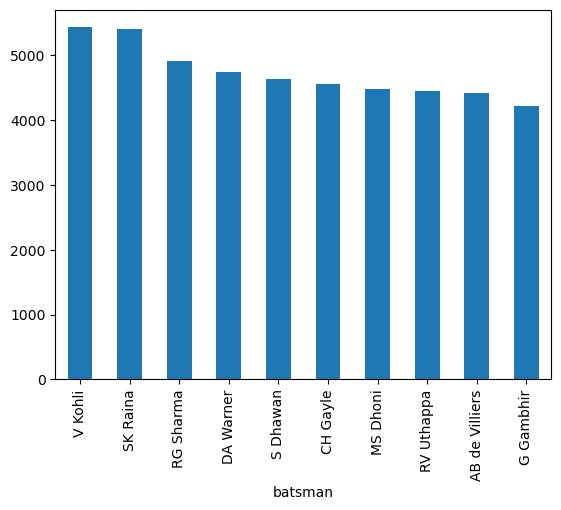

In [137]:
max_runs = ddf.groupby(['batsman'])['batsman_runs'].sum()
max_runs.sort_values(ascending=False,inplace=True)
max_runs[:10].plot(kind='bar')

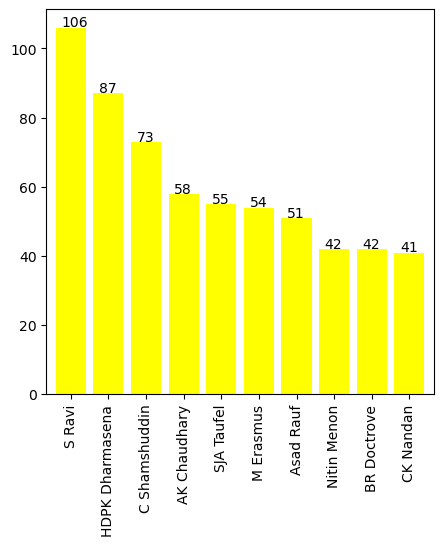

In [170]:
#Favoutite Umpires
plt.subplots(figsize=(5,5))
ump=pd.concat([mdf['umpire1'],mdf['umpire2']]) 
ax=ump.value_counts().head(10).plot.bar(width=0.8,color='Yellow')
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x()+0.15, p.get_height()+0.25))
plt.show()

In [139]:
#Season's Winner
season_winner = mdf.drop_duplicates(subset=['season'], keep='last')[['season', 'winner']].reset_index(drop=True)
season_winner

,season,winner
0,2017,Mumbai Indians
1,2008,Rajasthan Royals
2,2009,Deccan Chargers
3,2010,Chennai Super Kings
4,2011,Chennai Super Kings
5,2012,Kolkata Knight Riders
6,2013,Mumbai Indians
7,2014,Kolkata Knight Riders
8,2015,Mumbai Indians
9,2016,Sunrisers Hyderabad


In [140]:
#Number of Wickets taken:
bowler_wickets = ddf.groupby('bowler').aggregate({'ball': 'count', 'total_runs': 'sum', 'player_dismissed' : 'count'})
bowler_wickets.columns = ['runs','balls','wickets']
TopBowlerBywickets = bowler_wickets.sort_values(['wickets'], ascending=False)[:20]
TopBowlerBywickets

,runs,balls,wickets
bowler,,,
SL Malinga,2974,3511,188
DJ Bravo,2711,3733,168
A Mishra,3172,3850,165
Harbhajan Singh,3451,4050,161
PP Chawla,3157,4153,156
B Kumar,2707,3264,141
R Ashwin,3016,3391,138
SP Narine,2600,2939,137
UT Yadav,2605,3640,136


In [141]:
#Bowler Strike Rate:
#Bowler Strike Rate = Total number of Runs / Total number of Wickets

TopBowlerBywickets['strikerate'] = TopBowlerBywickets['runs']/TopBowlerBywickets['wickets']
TopBowlerBywickets = TopBowlerBywickets.sort_values(['strikerate'], ascending=False)[:20]
TopBowlerBywickets

,runs,balls,wickets,strikerate
bowler,,,,
P Kumar,2637,3342,102,25.852941
RA Jadeja,2541,3221,116,21.905172
R Ashwin,3016,3391,138,21.855072
Harbhajan Singh,3451,4050,161,21.434783
DW Steyn,2207,2454,104,21.221154
PP Chawla,3157,4153,156,20.237179
SR Watson,2137,2751,107,19.971963
PP Ojha,1945,2399,99,19.646465
A Mishra,3172,3850,165,19.224242


# SRH inning

In [142]:
srh = match_1[match_1['inning']==1]
srh.head(3)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN


In [143]:
#Runs in an inning
srh['batsman_runs'].value_counts()

1    57
0    32
4    17
6     9
2     9
3     1
Name: batsman_runs, dtype: int64

In [144]:
#Kind of Dismissal
srh['dismissal_kind'].value_counts()

caught    3
bowled    1
Name: dismissal_kind, dtype: int64

# RCB inning


In [145]:
rcb = match_1[match_1['inning']==2]
rcb.head(2)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
125,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,Mandeep Singh,A Nehra,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
126,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,CH Gayle,A Nehra,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN


In [146]:
#Runs in an inning
rcb['batsman_runs'].value_counts()

0    49
1    44
4    15
6     8
2     7
Name: batsman_runs, dtype: int64

In [147]:
rcb['dismissal_kind'].value_counts()

caught     6
bowled     2
run out    2
Name: dismissal_kind, dtype: int64

Batsman analysis
Let us start our analysis with batsman. Let us first see the ones with most number of IPL runs under their belt.

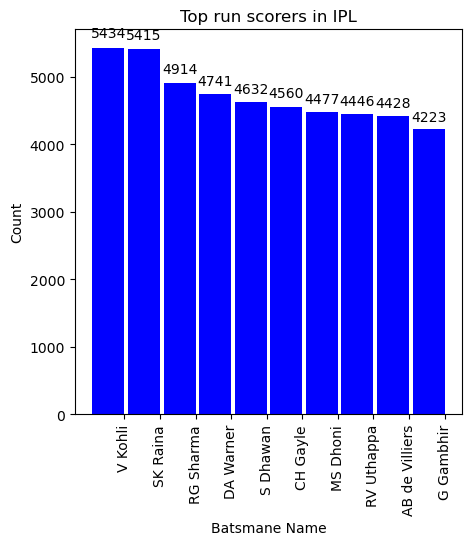

In [169]:
temp_df = ddf.groupby('batsman')['batsman_runs'].agg('sum').reset_index().sort_values(by='batsman_runs', ascending=False).reset_index(drop=True)
temp_df = temp_df.iloc[:10,:]

labels = np.array(temp_df['batsman'])
ind = np.arange(len(labels))
width = 0.9
fig, ax = plt.subplots(figsize=(5,5))
rects = ax.bar(ind, np.array(temp_df['batsman_runs']), width=width, color='blue')
ax.set_xticks(ind+((width)/2.))
ax.set_xticklabels(labels, rotation='vertical')
ax.set_ylabel("Count")
ax.set_title("Top run scorers in IPL")
ax.set_xlabel('Batsmane Name')
autolabel(rects)
plt.show()

Virat Kohli is leading the chart followed closely by Raina. Gayle is the top scorer among foreign players

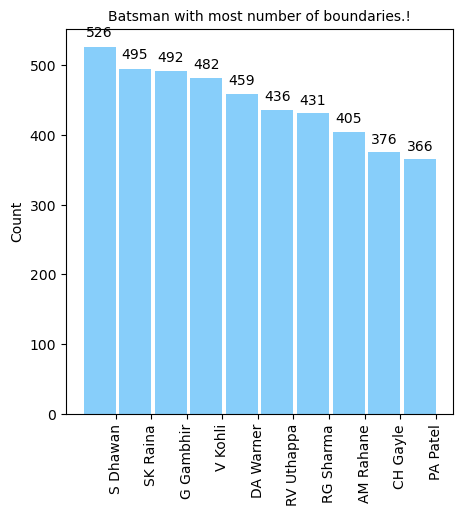

In [168]:
# Now let us see the players with more number of boundaries in IPL.
temp_df = ddf.groupby('batsman')['batsman_runs'].agg(lambda x: (x==4).sum()).reset_index().sort_values(by='batsman_runs', ascending=False).reset_index(drop=True)
temp_df = temp_df.iloc[:10,:]

labels = np.array(temp_df['batsman'])
ind = np.arange(len(labels))
width = 0.9
fig, ax = plt.subplots(figsize=(5,5))
rects = ax.bar(ind, np.array(temp_df['batsman_runs']), width=width, color='lightskyblue')
ax.set_xticks(ind+((width)/2.))
ax.set_xticklabels(labels, rotation='vertical')
ax.set_ylabel("Count")
ax.set_title("Batsman with most number of boundaries.!",fontsize = 10)
autolabel(rects)
plt.show()

Gambhir is way ahead of others - almost 60 boundaries more than Kohli.! Nice to Sachin in the top 10 list :)

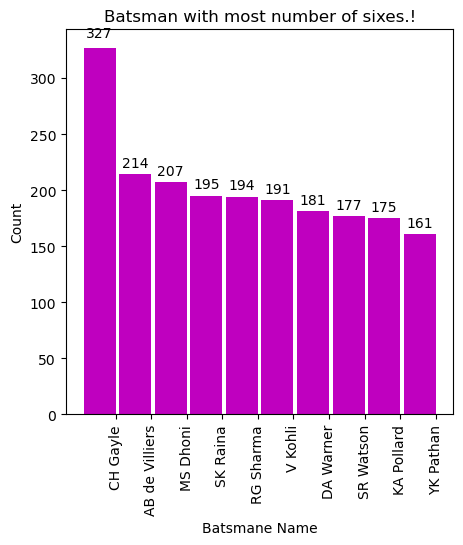

In [167]:
# Now let us check the number of 6's
temp_df = ddf.groupby('batsman')['batsman_runs'].agg(lambda x: (x==6).sum()).reset_index().sort_values(by='batsman_runs', ascending=False).reset_index(drop=True)
temp_df = temp_df.iloc[:10,:]

labels = np.array(temp_df['batsman'])
ind = np.arange(len(labels))
width = 0.9
fig, ax = plt.subplots(figsize=(5,5))
rects = ax.bar(ind, np.array(temp_df['batsman_runs']), width=width, color='m')
ax.set_xticks(ind+((width)/2.))
ax.set_xticklabels(labels, rotation=90)
ax.set_ylabel("Count")
ax.set_title("Batsman with most number of sixes.!")
ax.set_xlabel('Batsmane Name')
autolabel(rects)
plt.show()

There you see the big man. Gayle, the unassailable leader in the number of sixes.

Raina is third in both number of 4's and 6's

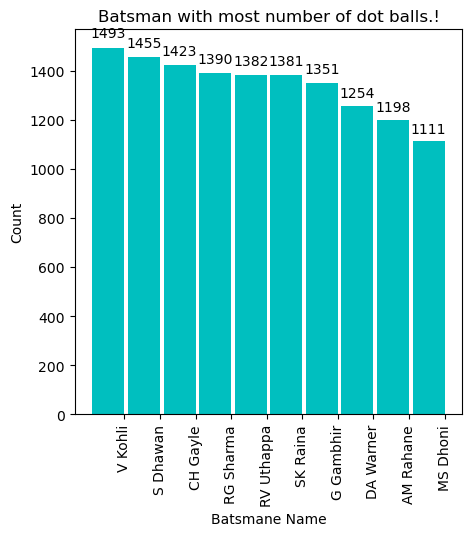

In [166]:
# Now let us see the batsman who has played the most number of dot balls.
temp_df = ddf.groupby('batsman')['batsman_runs'].agg(lambda x: (x==0).sum()).reset_index().sort_values(by='batsman_runs', ascending=False).reset_index(drop=True)
temp_df = temp_df.iloc[:10,:]

labels = np.array(temp_df['batsman'])
ind = np.arange(len(labels))
width = 0.9
fig, ax = plt.subplots(figsize=(5,5))
rects = ax.bar(ind, np.array(temp_df['batsman_runs']), width=width, color='c')
ax.set_xticks(ind+((width)/2.))
ax.set_xticklabels(labels, rotation='vertical')
ax.set_ylabel("Count")
ax.set_title("Batsman with most number of dot balls.!")
ax.set_xlabel('Batsmane Name')
autolabel(rects)
plt.show()


It is interesting to see that the same names repeat again here as well. I think since these guys have played more number of balls, they have more dot balls as well.

C:\Users\hp\AppData\Local\Temp\ipykernel_13940\171742901.py:28: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax2.grid(b=False)


<Figure size 500x500 with 0 Axes>

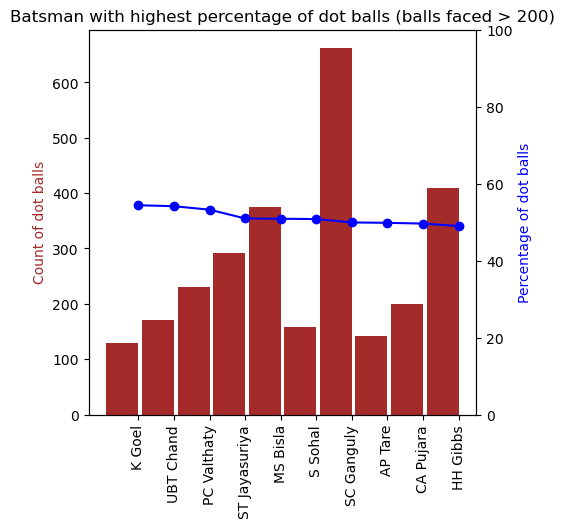

In [165]:
# Let us check the percentage distribution now.
plt.figure(figsize=(5,5))
def balls_faced(x):
    return len(x)

def dot_balls(x):
    return (x==0).sum()

temp_df = ddf.groupby('batsman')['batsman_runs'].agg([balls_faced, dot_balls]).reset_index()
temp_df = temp_df.loc[temp_df.balls_faced>200,:]
temp_df['percentage_of_dot_balls'] = (temp_df['dot_balls'] / temp_df['balls_faced'])*100.
temp_df = temp_df.sort_values(by='percentage_of_dot_balls', ascending=False).reset_index(drop=True)
temp_df = temp_df.iloc[:10,:]

fig, ax1 = plt.subplots(figsize=(5,5))
ax2 = ax1.twinx()
labels = np.array(temp_df['batsman'])
ind = np.arange(len(labels))
width = 0.9
rects = ax1.bar(ind, np.array(temp_df['dot_balls']), width=width, color='brown')
ax1.set_xticks(ind+((width)/2.))
ax1.set_xticklabels(labels, rotation='vertical')
ax1.set_ylabel("Count of dot balls", color='brown')
ax1.set_title("Batsman with highest percentage of dot balls (balls faced > 200)")
ax2.plot(ind+0.45, np.array(temp_df['percentage_of_dot_balls']), color='b', marker='o')
ax2.set_ylabel("Percentage of dot balls", color='b')
ax2.set_ylim([0,100])
ax2.grid(b=False)
plt.show()


Batsman with more than 300 balls faced in taken and the ones with higher percentage of dot balls are seen. It is interesting to see Ganguly with more than 1000 balls and nearly half of them are dot balls. It is surprising to see names like Jayasuriya and Gibbs in there.!

Bowler Analysis
Now let us see the bowlers who has bowled most number of balls in IPL.

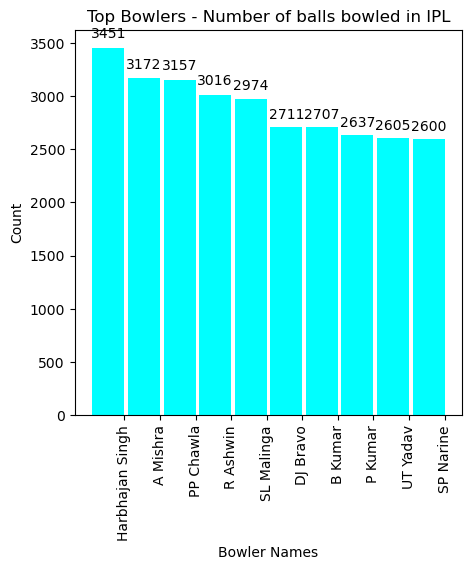

In [163]:
temp_df = ddf.groupby('bowler')['ball'].agg('count').reset_index().sort_values(by='ball', ascending=False).reset_index(drop=True)
temp_df = temp_df.iloc[:10,:]

labels = np.array(temp_df['bowler'])
ind = np.arange(len(labels))
width = 0.9
fig, ax = plt.subplots(figsize=(5,5))
rects = ax.bar(ind, np.array(temp_df['ball']), width=width, color='cyan')
ax.set_xticks(ind+((width)/2.))
ax.set_xticklabels(labels, rotation='vertical')
ax.set_ylabel("Count")
ax.set_title("Top Bowlers - Number of balls bowled in IPL")
ax.set_xlabel('Bowler Names')
autolabel(rects)
plt.show()


Harbhajan Singh is the the bowler with most number of balls bowled in IPL matches. Now let us see the bowler with more number of dot balls.

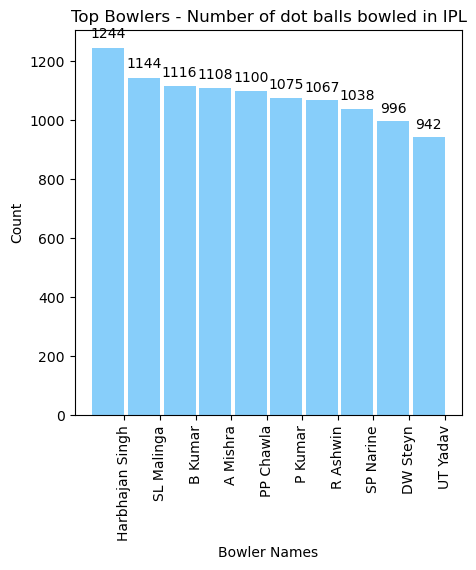

In [162]:
temp_df = ddf.groupby('bowler')['total_runs'].agg(lambda x: (x==0).sum()).reset_index().sort_values(by='total_runs', ascending=False).reset_index(drop=True)
temp_df = temp_df.iloc[:10,:]

labels = np.array(temp_df['bowler'])
ind = np.arange(len(labels))
width = 0.9
fig, ax = plt.subplots(figsize=(5,5))
rects = ax.bar(ind, np.array(temp_df['total_runs']), width=width, color='lightskyblue')
ax.set_xticks(ind+((width)/2.))
ax.set_xticklabels(labels, rotation='vertical')
ax.set_ylabel("Count")
ax.set_title("Top Bowlers - Number of dot balls bowled in IPL")
ax.set_xlabel('Bowler Names')
autolabel(rects)
plt.show()


Pravin Kumar is the one with more number of dot balls followed by Steyn and Malinga

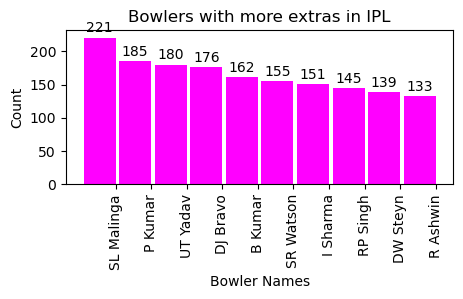

In [160]:
# Now let us see the bowlers who has bowled more number of extras in IPL.
temp_df = ddf.groupby('bowler')['extra_runs'].agg(lambda x: (x>0).sum()).reset_index().sort_values(by='extra_runs', ascending=False).reset_index(drop=True)
temp_df = temp_df.iloc[:10,:]

labels = np.array(temp_df['bowler'])
ind = np.arange(len(labels))
width = 0.9
fig, ax = plt.subplots(figsize=(5,2))
rects = ax.bar(ind, np.array(temp_df['extra_runs']), width=width, color='magenta')
ax.set_xticks(ind+((width)/2.))
ax.set_xticklabels(labels, rotation='vertical')
ax.set_ylabel("Count")
ax.set_title("Bowlers with more extras in IPL")
ax.set_xlabel('Bowler Names')
autolabel(rects)
plt.show()

Malinga tops the chart with 221 extra runs followed by Pravin Kumar.

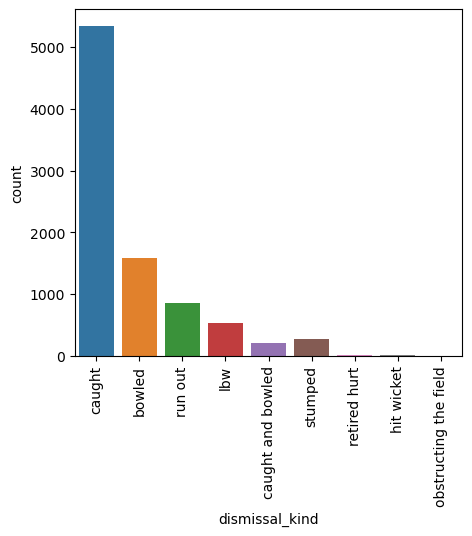

In [161]:
# Now let us see most common dismissal types in IPL.
plt.figure(figsize=(5,4.5))
sns.countplot(x='dismissal_kind', data=ddf)
plt.xticks(rotation='vertical')
plt.show()

Caught is the most common dismissal type in IPL followed by Bowled. There are very few instances of hit wicket as well. 'Obstructing the field' is one of the dismissal type as well in IPL.!